In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Einlesen der Daten
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter = ';' )
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv',delimiter = ';')
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv',delimiter = ';')



DMS Score Spalten zu float konvertieren:

In [18]:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_deng.head()

data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler.head()

data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg.tail()



,mutant,mutated_sequence,DMS_score,DMS_score_bin
4778,W286G,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0056,0
4779,W286F,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.1729,0
4780,W286E,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0171,0
4781,W286C,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0024,0
4782,W286D,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0114,0


In [19]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


Data Frame erstellen

In [20]:

columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame( columns = columns, index = index)
merged.head()
#leerer frame

,Stiffler,Deng,Firnberg
H24C,NaN,NaN,NaN
H24Y,NaN,NaN,NaN
H24W,NaN,NaN,NaN
H24V,NaN,NaN,NaN
H24T,NaN,NaN,NaN


In [21]:
#dataframe füllen
for i in range(0,len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant]= score

merged.head()

  

,Stiffler,Deng,Firnberg
H24C,-0.41826,NaN,NaN
H24Y,-0.885025,NaN,NaN
H24W,-1.347586,NaN,NaN
H24V,-0.026874,NaN,NaN
H24T,-0.067188,NaN,NaN


In [22]:
#deng wird umgedreht *-1
for i in range(0,len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]*-1
    merged['Deng'][mutant]= score

merged.head()

,Stiffler,Deng,Firnberg
H24C,-0.41826,3.924478,NaN
H24Y,-0.885025,2.170022,NaN
H24W,-1.347586,4.345218,NaN
H24V,-0.026874,3.011503,NaN
H24T,-0.067188,1.565248,NaN


In [23]:
for i in range(0,len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant]= score

print(merged)

       Stiffler      Deng Firnberg
H24C   -0.41826  3.924478   0.5646
H24Y  -0.885025  2.170022   0.7054
H24W  -1.347586  4.345218   0.6021
H24V  -0.026874  3.011503   1.2224
H24T  -0.067188  1.565248   1.2289
...         ...       ...      ...
W286G -3.228429   4.96307   0.0056
W286F -0.780425  4.542329   0.1729
W286E -2.545852  4.542329   0.0171
W286C -2.983762  4.542329   0.0024
W286A -3.178798   4.96307      NaN

[4996 rows x 3 columns]


Merged Dataframe nicht Normalisiert

In [24]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

print(mergedc_n.head(20))

      Stiffler      Deng Firnberg
H24C  -0.41826  3.924478   0.5646
H24Y -0.885025  2.170022   0.7054
H24W -1.347586  4.345218   0.6021
H24V -0.026874  3.011503   1.2224
H24T -0.067188  1.565248   1.2289
H24S  0.036166  1.901829   1.1215
H24R -0.002526  1.732651   1.0547
H24Q -0.135568  1.685328   0.9294
H24P -1.010848   2.74331   0.2836
H24D -0.181607  2.788294   1.0992
H24M -0.224781  4.345218      NaN
H24L -0.480347  3.924478   0.8055
H24K   0.01447   0.47765   1.2413
H24I -0.359191   2.83688   0.7909
H24G -0.060242  2.113703   1.1275
H24F -0.818487  4.345218   0.7883
H24E -0.279024  1.486533   0.9899
H24N -0.043093  1.102421   1.4825
P25C -0.364138   3.92495   0.6226
P25D -0.028403   3.92495   0.6841


N Normalisierter dataframe :  merged_n

In [25]:
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.749673  0.194307
H24Y   0.697293  0.543632  0.242832
H24W   0.584448  0.799085   0.20723
H24V   0.906646  0.642454  0.421009
H24T   0.896811  0.472607  0.423249
...         ...       ...       ...
W286G  0.125601  0.871645  0.001654
W286F  0.722811  0.822233  0.059312
W286E  0.292121  0.822233  0.005618
W286C   0.18529  0.822233  0.000551
W286A  0.137709  0.871645       NaN

[4996 rows x 3 columns]


Z Normalisierter data frame: mergedc_z
mü und sigma für Datensätze : 

In [26]:
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])
    
    gauss[x] = [mu, sigma]
print(gauss)



{'Stiffler': [-1.2555861699099258, 1.1515351455907572], 'Deng': [2.7197178679617875, 1.527209855765294], 'Firnberg': [0.5094850899205352, 0.44877201488038154]}


Z-Normalisierung

In [27]:
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
print(z_filter(mergedc_z))


       Stiffler      Deng  Firnberg
H24C   0.727139  0.788864  0.122813
H24Y   0.321797 -0.359935  0.436558
H24W  -0.079893  1.064359  0.206374
H24V   1.067021  0.191058   1.58859
H24T   1.032012 -0.755934  1.603074
...         ...       ...       ...
W286G -1.713229  1.468922 -1.122809
W286F  0.412633  1.193425 -0.750014
W286E -1.120475  1.193425 -1.097183
W286C -1.500758  1.193425 -1.129939
W286A -1.670129  1.468922       NaN

[4996 rows x 3 columns]


##Normalisierte Datensätze mergen:
1. mean und var berechnen
2. für z und n normalisierte Datensatz 



mergedc_n_mv = mergedc_n.copy()
liste = mergedc_n_mv.mean(axis = 1)
print(liste)




In [28]:
def mean_var_merge(data : pd.DataFrame):
    
    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data
#print(mean_var_merge(mergedc_n_mv))
#print(mean_var_merge(mergedc_z_mv))
#print(mergedc_n_mv)

POSITIONSEFFEKTE

In [29]:
mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)


,Stiffler,Deng,Firnberg,mean,var
H24C,0.727139,0.788864,0.122813,0.546272,0.090294
H24Y,0.321797,-0.359935,0.436558,0.132807,0.123592
H24W,-0.079893,1.064359,0.206374,0.396947,0.236378
H24V,1.067021,0.191058,1.58859,0.94889,0.332494
H24T,1.032012,-0.755934,1.603074,0.626384,1.009754
...,...,...,...,...,...
W286G,-1.713229,1.468922,-1.122809,-0.455705,1.910194
W286F,0.412633,1.193425,-0.750014,0.285348,0.637593
W286E,-1.120475,1.193425,-1.097183,-0.341411,1.177952
W286C,-1.500758,1.193425,-1.129939,-0.479091,1.421573


In [30]:

#append empty Position-column
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)
mergedc_n_mv["Position"]=mergedc_n_mv["Position"].astype(int)

mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)
mergedc_z_mv["Position"] = mergedc_z_mv["Position"].astype(int)


C:\Users\malte\AppData\Local\Temp\ipykernel_26856\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_26856\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_26856\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Positio

In [31]:
mergedc_z_mv["Position"]

H24C      24
H24Y      24
H24W      24
H24V      24
H24T      24
        ... 
W286G    286
W286F    286
W286E    286
W286C    286
W286A    286
Name: Position, Length: 4996, dtype: int32

In [32]:
#Position_means Df aufbauen
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)
##warum muss ich hier nochmal Int() nutzen? Ich habe im Chunk darüber doch int(part) verwendet...(Positionswerte wurden scheinbar als floats gespeichert)?

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"


In [33]:
for i in range(mergedc_n_mv["Position"][0], mergedc_n_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(mergedc_z_mv["Position"][0], mergedc_z_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [34]:
#means für Positionen berechnen mit groupby

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NAs should be excluded by default)

#Means der Positionen in Position_means DF einsetzen
position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]


In [35]:
#Varianzen noch einbringen
position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]


position_means

,mean_Stiffler_n,var_Stiffler_n,mean_Deng_n,var_Deng_n,mean_Firnberg_n,var_Firnberg_n,mean_all_n,var_all_n,mean_Stiffler_z,var_Stiffler_z,mean_Deng_z,var_Deng_z,mean_Firnberg_z,var_Firnberg_z,mean_all_z,var_all_z
Position,,,,,,,,,,,,,,,,
24,0.827952,0.009871,0.59217,0.019859,0.324853,0.01085,0.586504,0.054581,0.786898,0.125082,-0.089304,0.617338,0.966881,0.453596,0.54705,0.588671
25,0.868782,0.010995,0.575814,0.029516,0.251631,0.005555,0.565409,0.07808,0.932237,0.139314,-0.180497,0.917549,0.49345,0.232222,0.415063,0.616515
26,0.887442,0.001312,0.487997,0.009361,0.315543,0.007382,0.610183,0.059811,0.998662,0.01663,-0.670128,0.291014,0.906685,0.308594,0.318937,0.815305
27,0.463575,0.039616,0.654033,0.005709,0.095793,0.009894,0.404467,0.071123,-0.510157,0.50198,0.255614,0.177461,-0.514142,0.413599,-0.256228,0.476164
28,0.712919,0.045084,0.584403,0.017025,0.189328,0.009222,0.518661,0.069304,0.377421,0.571262,-0.132612,0.529266,0.090621,0.385542,0.113409,0.522439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.511994,0.082602,0.525065,0.018866,0.117033,0.019768,0.384697,0.074135,-0.337803,1.046659,-0.463454,0.58649,-0.376808,0.826386,-0.392689,0.779453
283,0.577036,0.064666,0.551495,0.013882,0.151755,0.01685,0.426762,0.068049,-0.106276,0.819396,-0.31609,0.431554,-0.152312,0.704399,-0.191559,0.625586
284,0.838571,0.021394,0.532812,0.020676,0.3261,0.009417,0.570109,0.060444,0.824699,0.271089,-0.420258,0.642744,0.974941,0.393654,0.450595,0.806401


In [206]:
#N-Normierung droppen
position_means_Z=position_means.iloc[:,8:]
position_means_Z

,mean_Stiffler_z,var_Stiffler_z,mean_Deng_z,var_Deng_z,mean_Firnberg_z,var_Firnberg_z,mean_all_z,var_all_z
Position,,,,,,,,
24,0.786898,0.125082,-0.089304,0.617338,0.966881,0.453596,0.54705,0.588671
25,0.932237,0.139314,-0.180497,0.917549,0.49345,0.232222,0.415063,0.616515
26,0.998662,0.01663,-0.670128,0.291014,0.906685,0.308594,0.318937,0.815305
27,-0.510157,0.50198,0.255614,0.177461,-0.514142,0.413599,-0.256228,0.476164
28,0.377421,0.571262,-0.132612,0.529266,0.090621,0.385542,0.113409,0.522439
...,...,...,...,...,...,...,...,...
282,-0.337803,1.046659,-0.463454,0.58649,-0.376808,0.826386,-0.392689,0.779453
283,-0.106276,0.819396,-0.31609,0.431554,-0.152312,0.704399,-0.191559,0.625586
284,0.824699,0.271089,-0.420258,0.642744,0.974941,0.393654,0.450595,0.806401


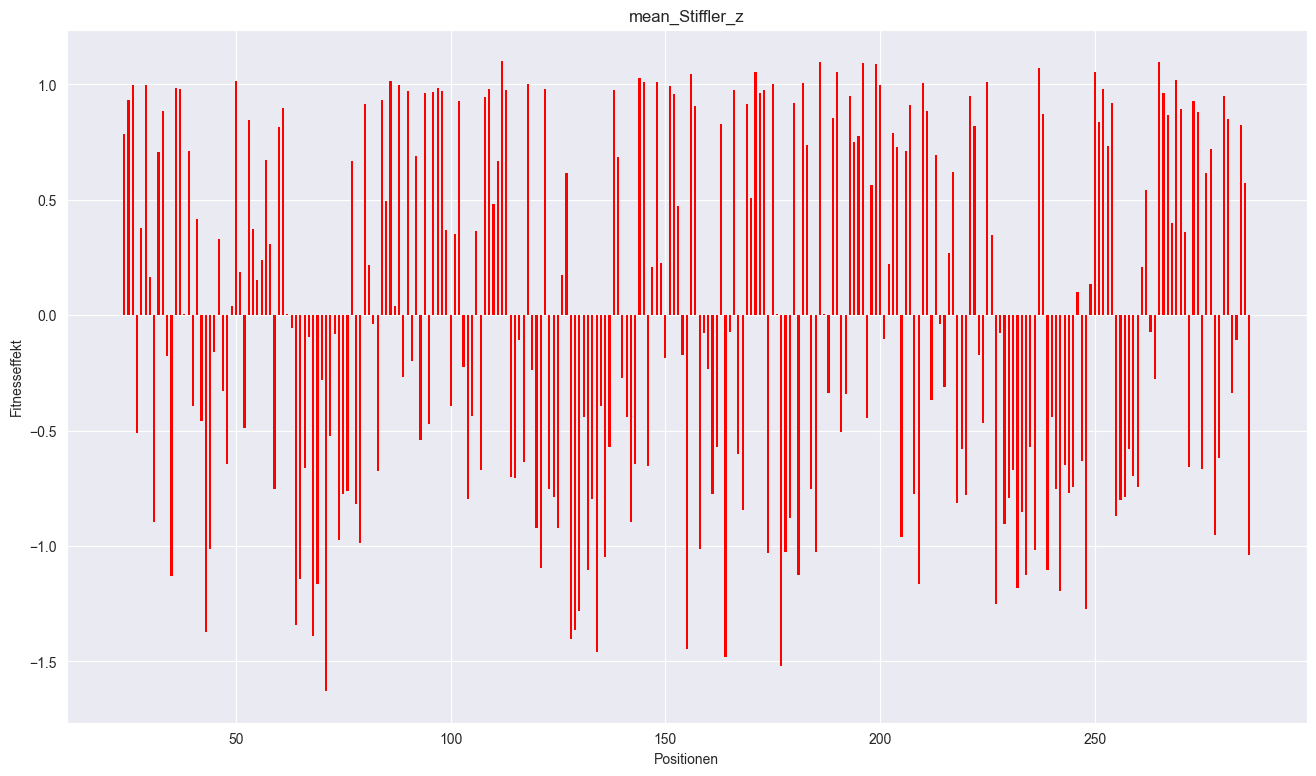

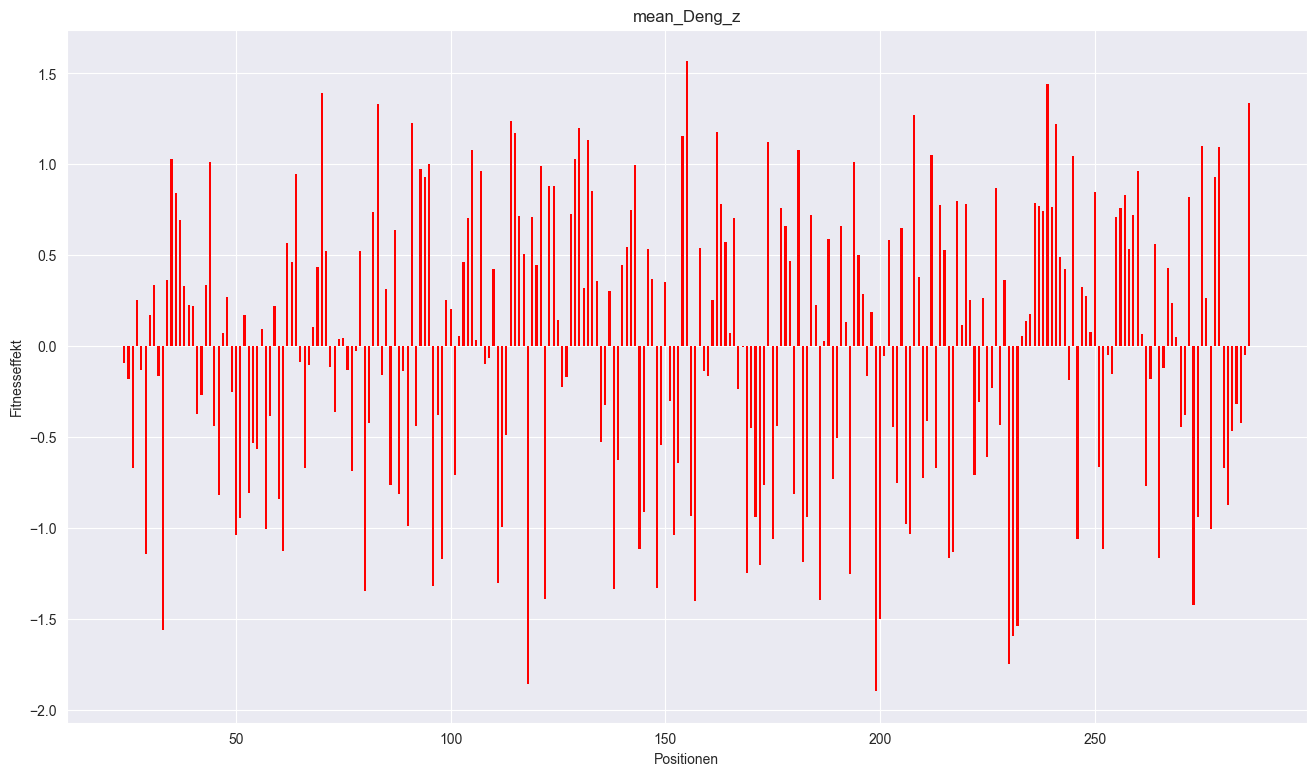

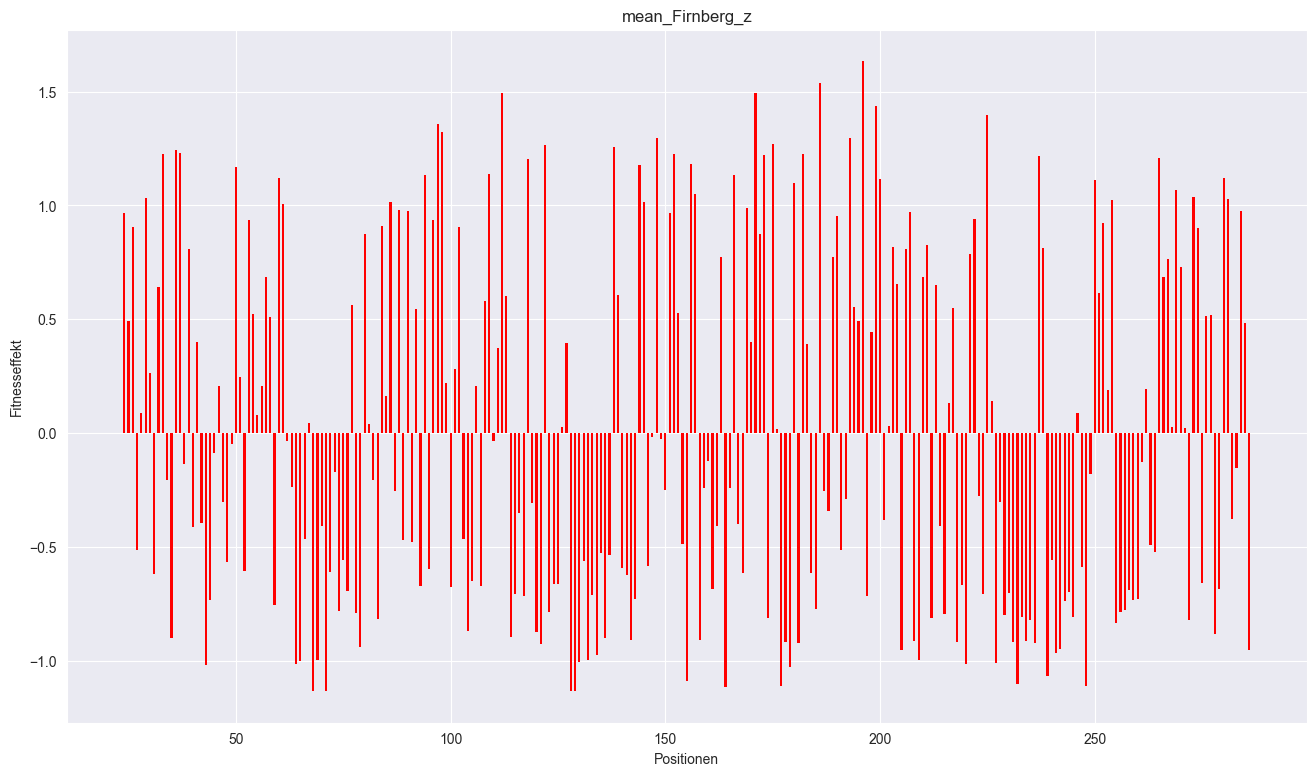

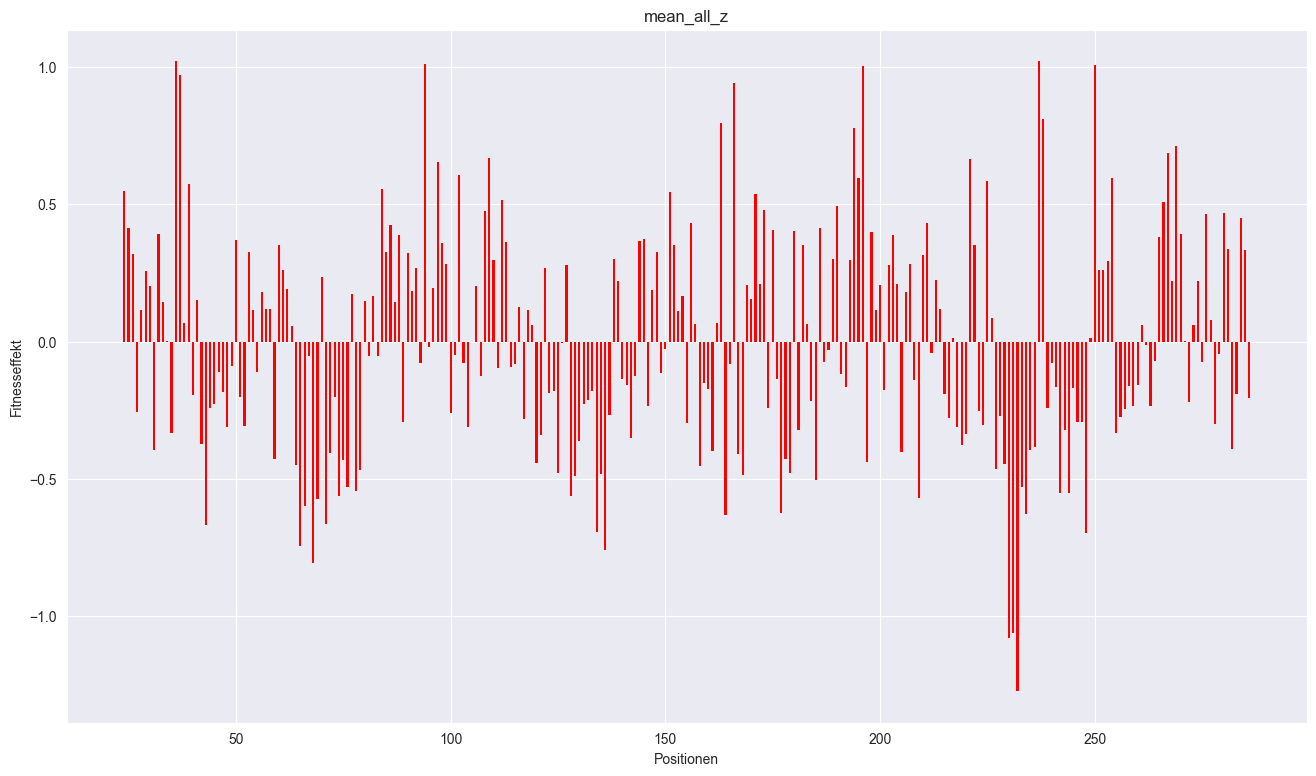

In [207]:
#Diagramme mit Positionseffekten
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()

In [211]:
#look at tops:
top_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
top_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in top_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = top_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    top_25_DSlist.append(new_DS)
top_25_DSlist

for i in range(0, len(top_25_DSlist)):
    t=top_25_DSlist[i].quantile(0.75)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    top_25_DSlist[i].iloc[:,0] = top_25_DSlist[i].iloc[:,0] >= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

#look at bottoms:
bottom_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
bottom_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in bottom_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = bottom_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    bottom_25_DSlist.append(new_DS)
bottom_25_DSlist

for i in range(0, len(bottom_25_DSlist)):
    t=bottom_25_DSlist[i].quantile(0.25)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    bottom_25_DSlist[i].iloc[:,0] = bottom_25_DSlist[i].iloc[:,0] <= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

In [216]:
top_25_DSlist

[      Stiffler  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
         Deng  Position
 H24C   False        24
 H24Y   False        24
 H24W    True        24
 H24V   False        24
 H24T   False        24
 ...      ...       ...
 W286G   True       286
 W286F   True       286
 W286E   True       286
 W286C   True       286
 W286A   True       286
 
 [4996 rows x 2 columns],
       Firnberg  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
    

In [212]:
#Positionsefekt von 0 bis 1:
top_25_DSlist_poseff=[]
for i in range (0, len(top_25_DSlist)):
    x=top_25_DSlist[i].iloc[:,0].groupby(top_25_DSlist[i].iloc[:,1])
    top_25_DSlist_poseff.append(x.mean()) #Durchschnitt der Werte in der Fitness-Value Spate (T or F, je nachdem ob Wert über oder unter Treshhold war) für jede Position. Ein Durchschnitt von 1 würde bedeuten, dass alle Mutanten True wären, also < Treshhold sind. So werden Positionen mit wenigen Mutanten nicht übersehen.

    bottom_25_DSlist_poseff=[]
for i in range (0, len(bottom_25_DSlist)):
    x=bottom_25_DSlist[i].iloc[:,0].groupby(bottom_25_DSlist[i].iloc[:,1])
    bottom_25_DSlist_poseff.append(x.mean())

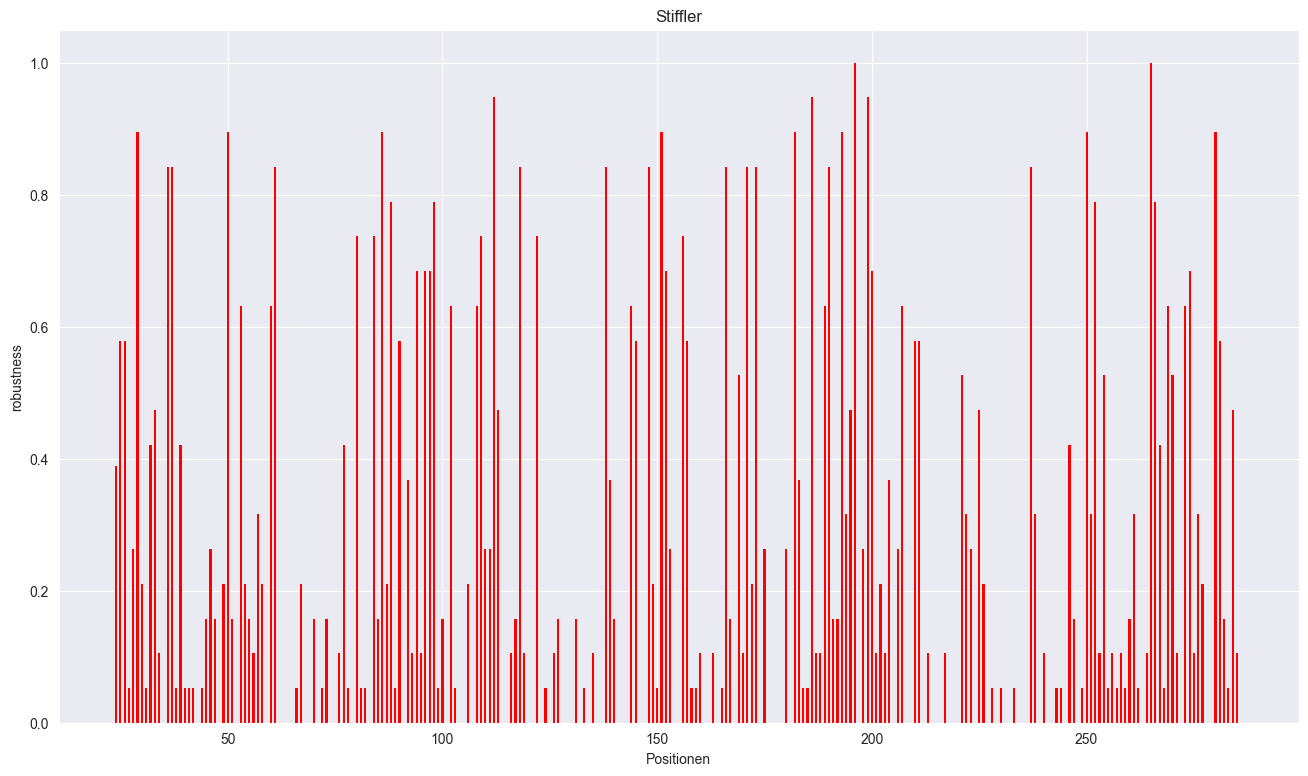

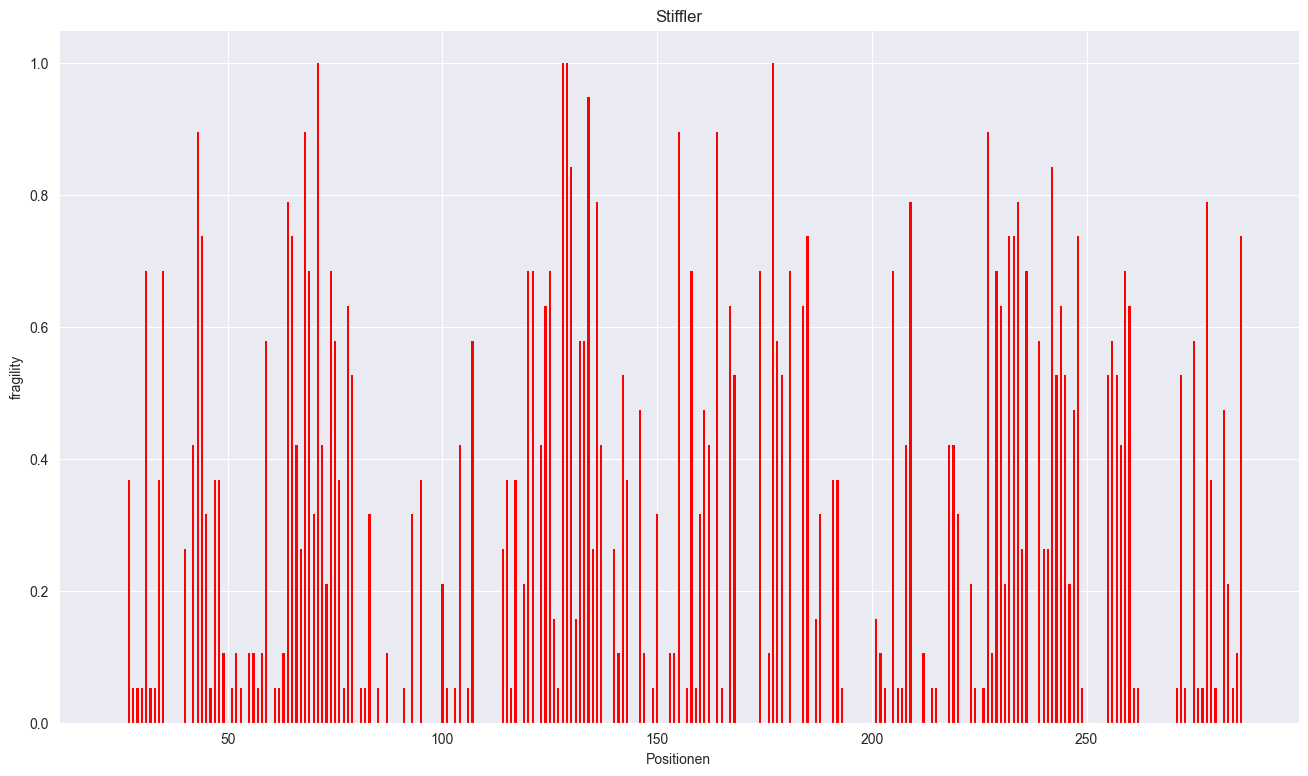

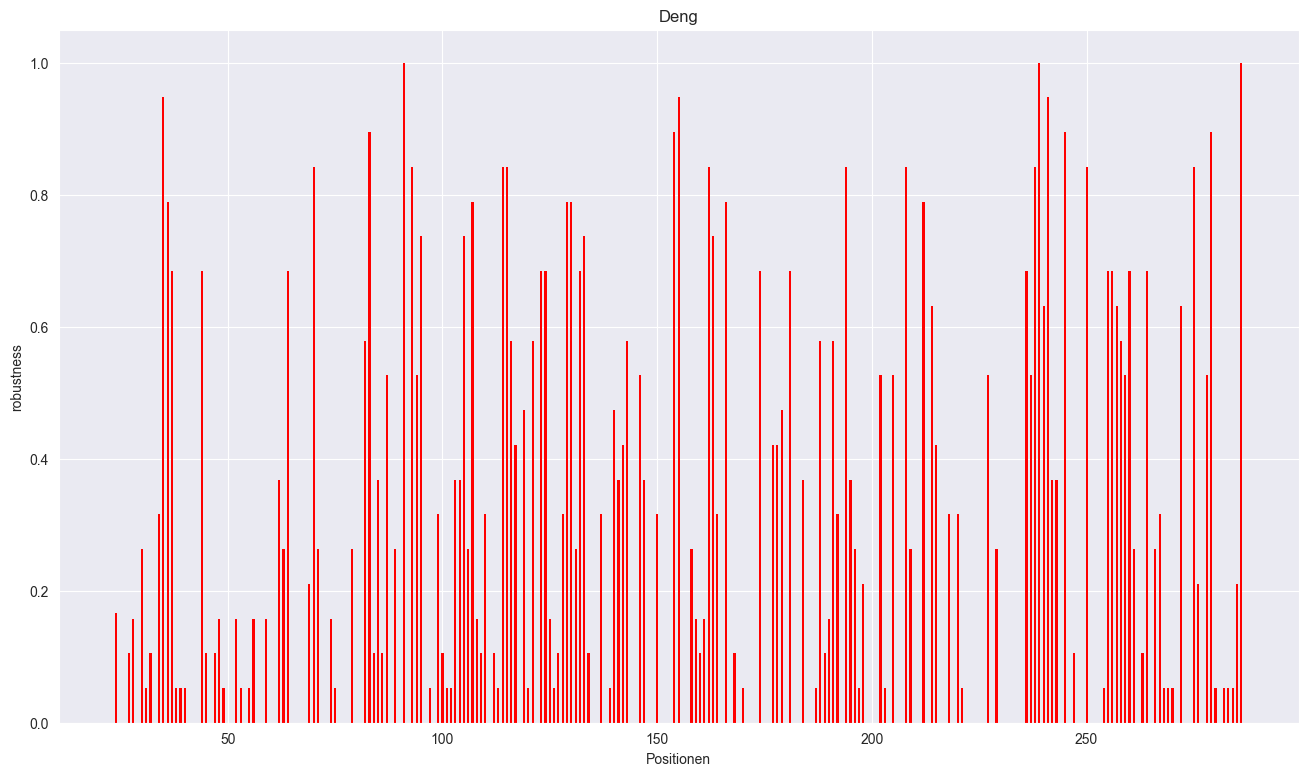

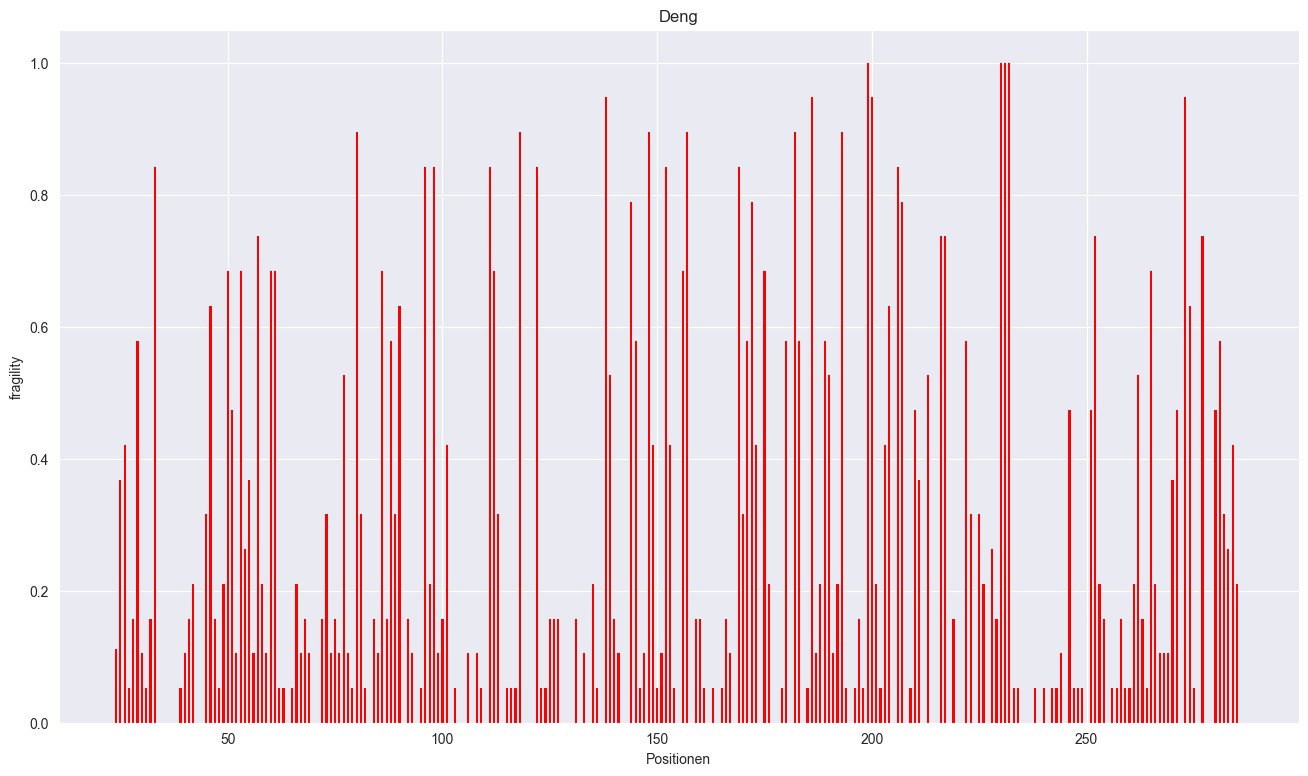

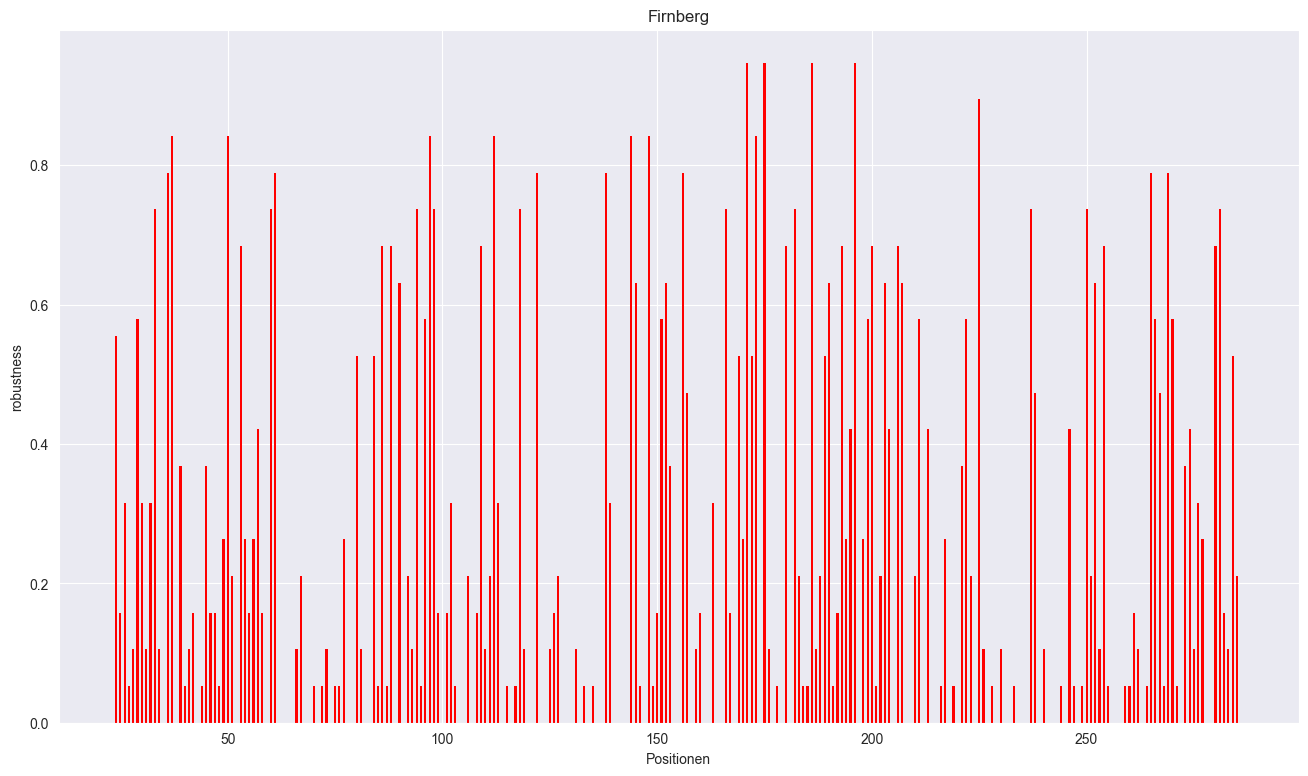

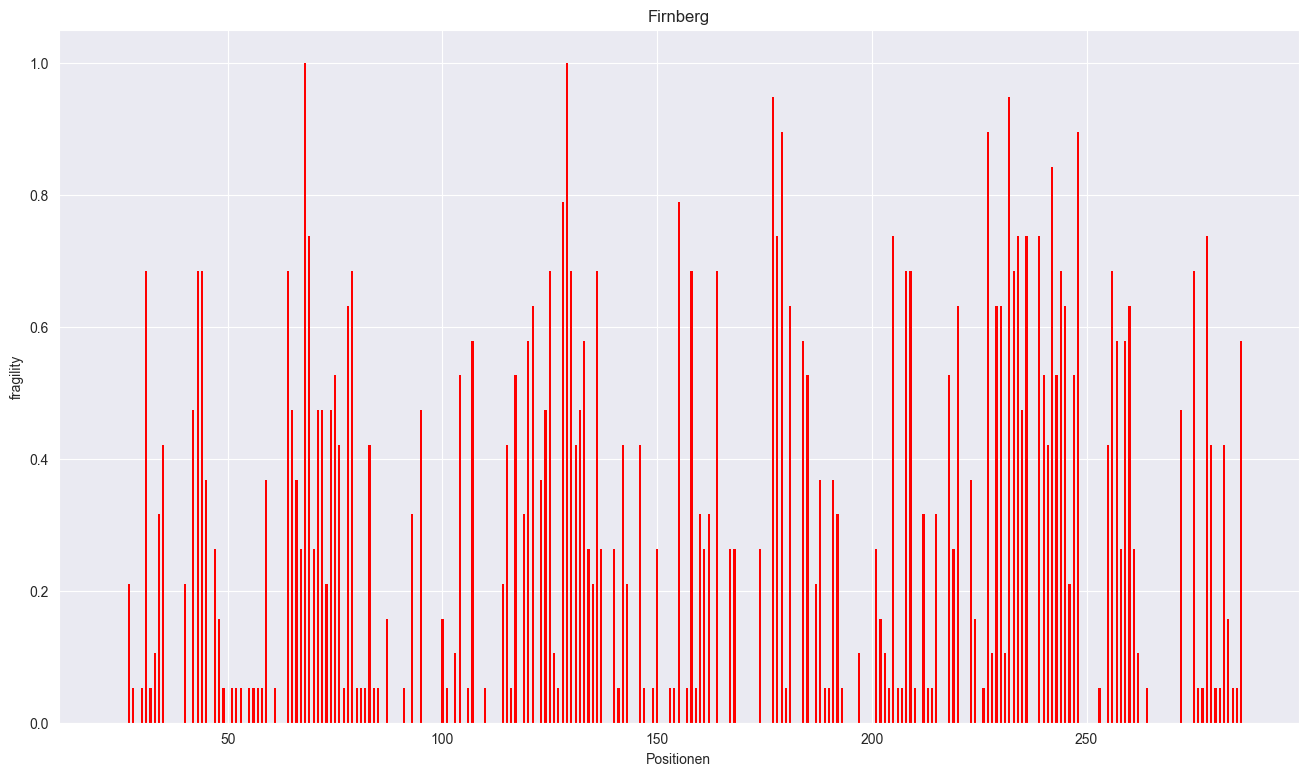

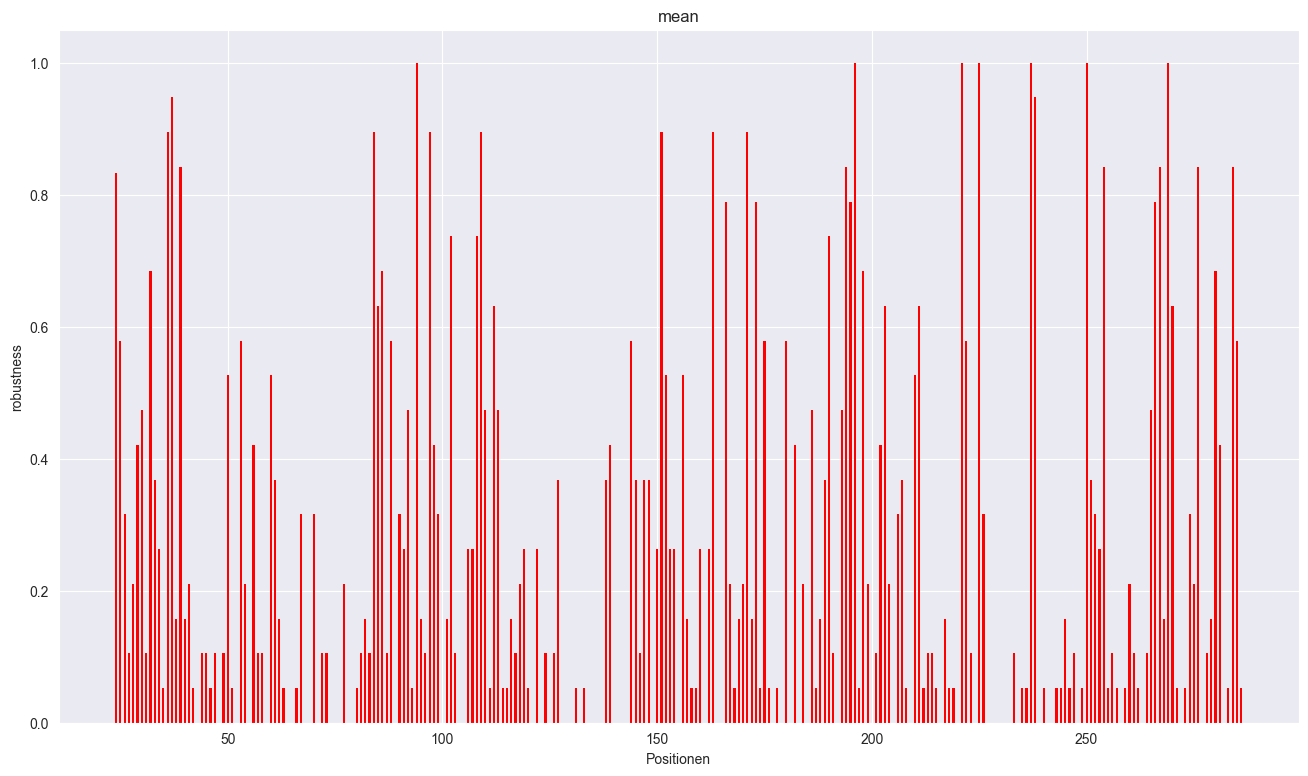

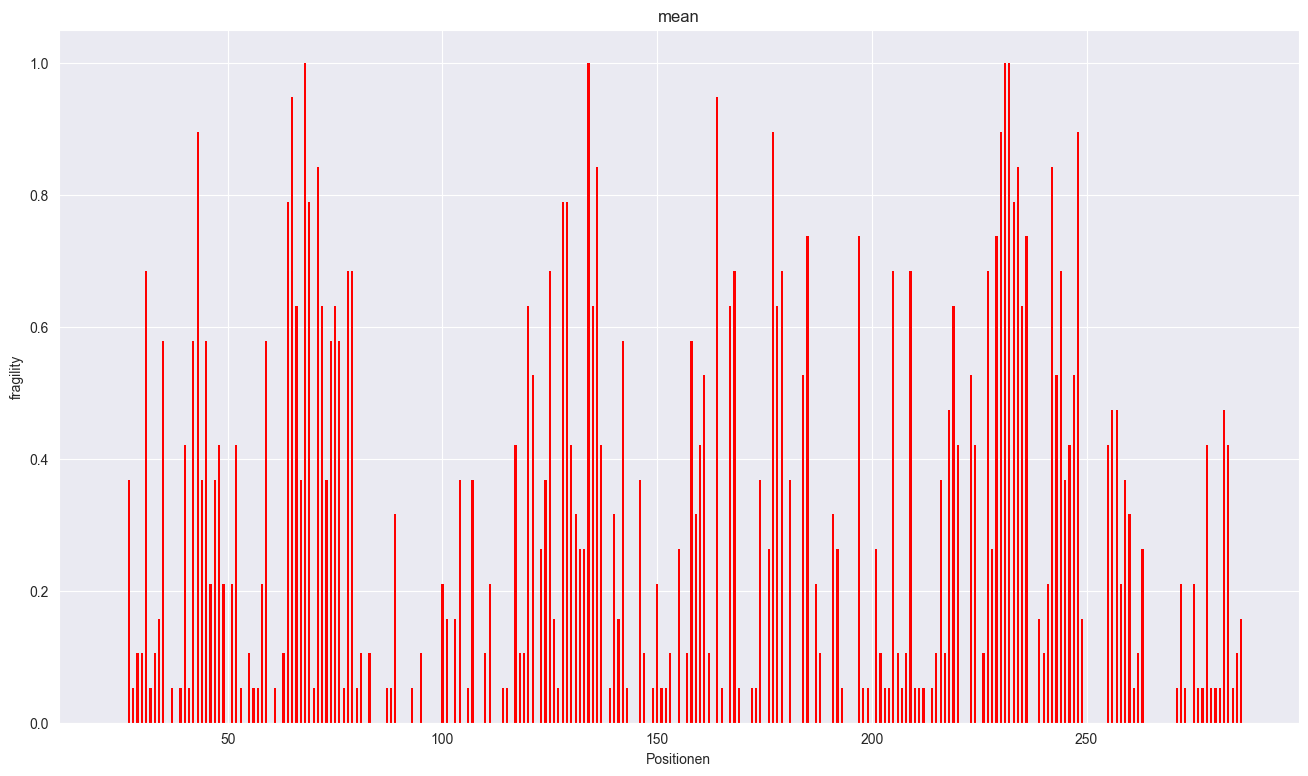

In [220]:
#plotten
for i in range (0, len(top_25_DSlist)):
    #tops
    ywerte = top_25_DSlist_poseff[i]
    xwerte = top_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("robustness")
    plt.title(top_25.columns[i])
    plt.show()

    #bottoms
    ywerte = bottom_25_DSlist_poseff[i]
    xwerte = bottom_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("fragility")
    plt.title(bottom_25.columns[i])
    plt.show()


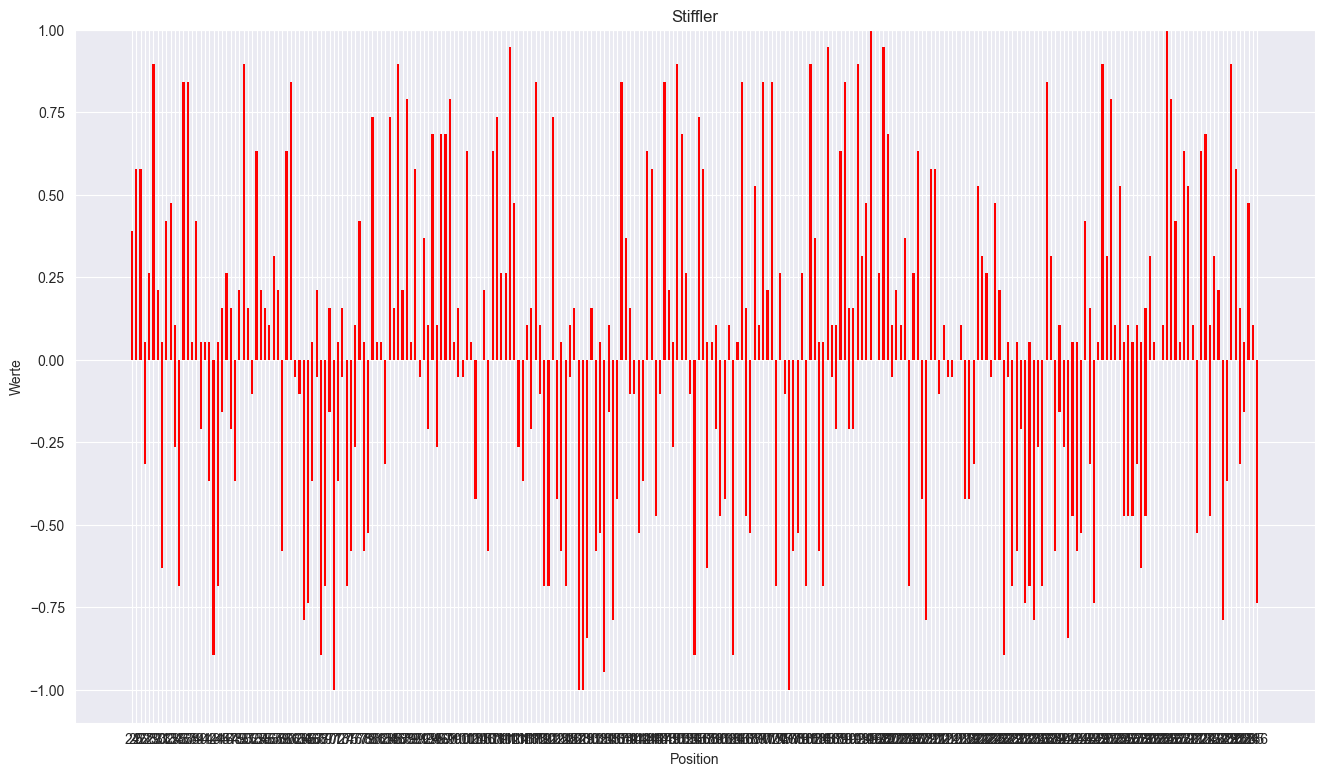

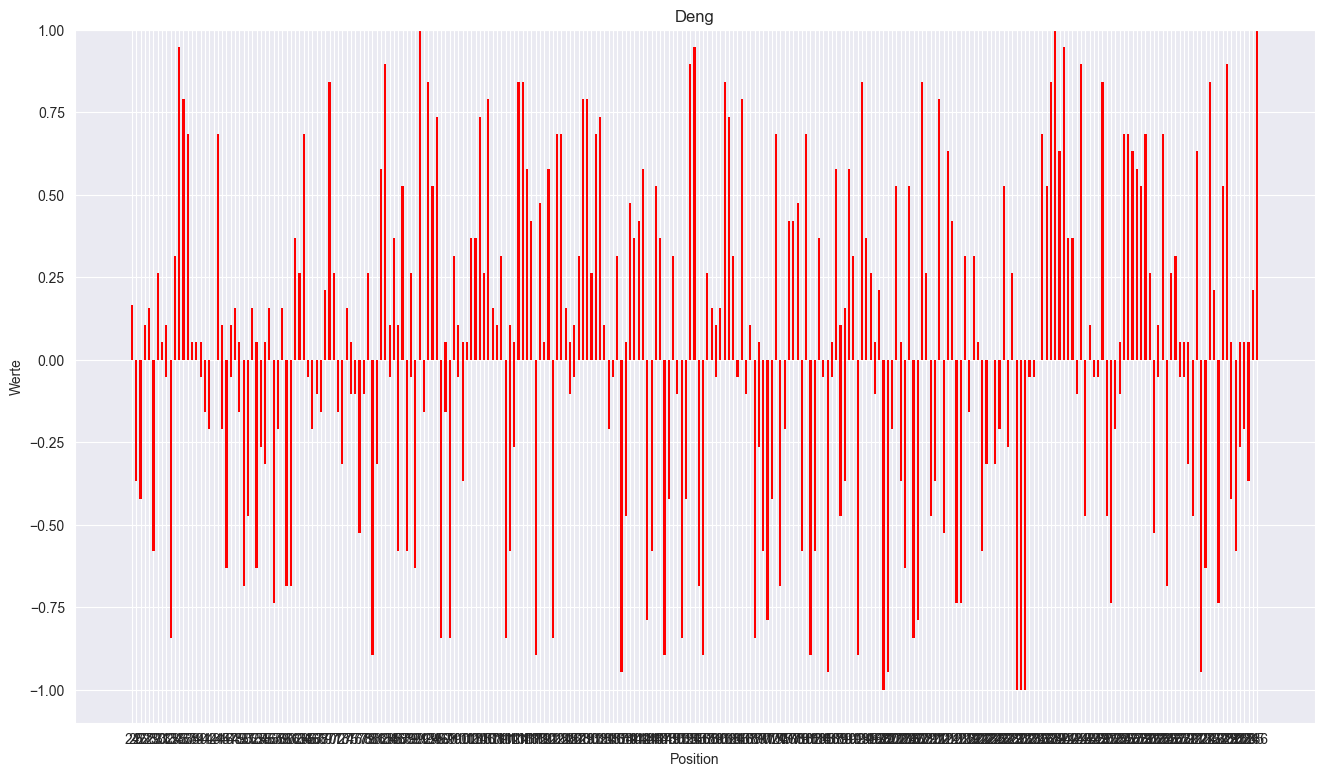

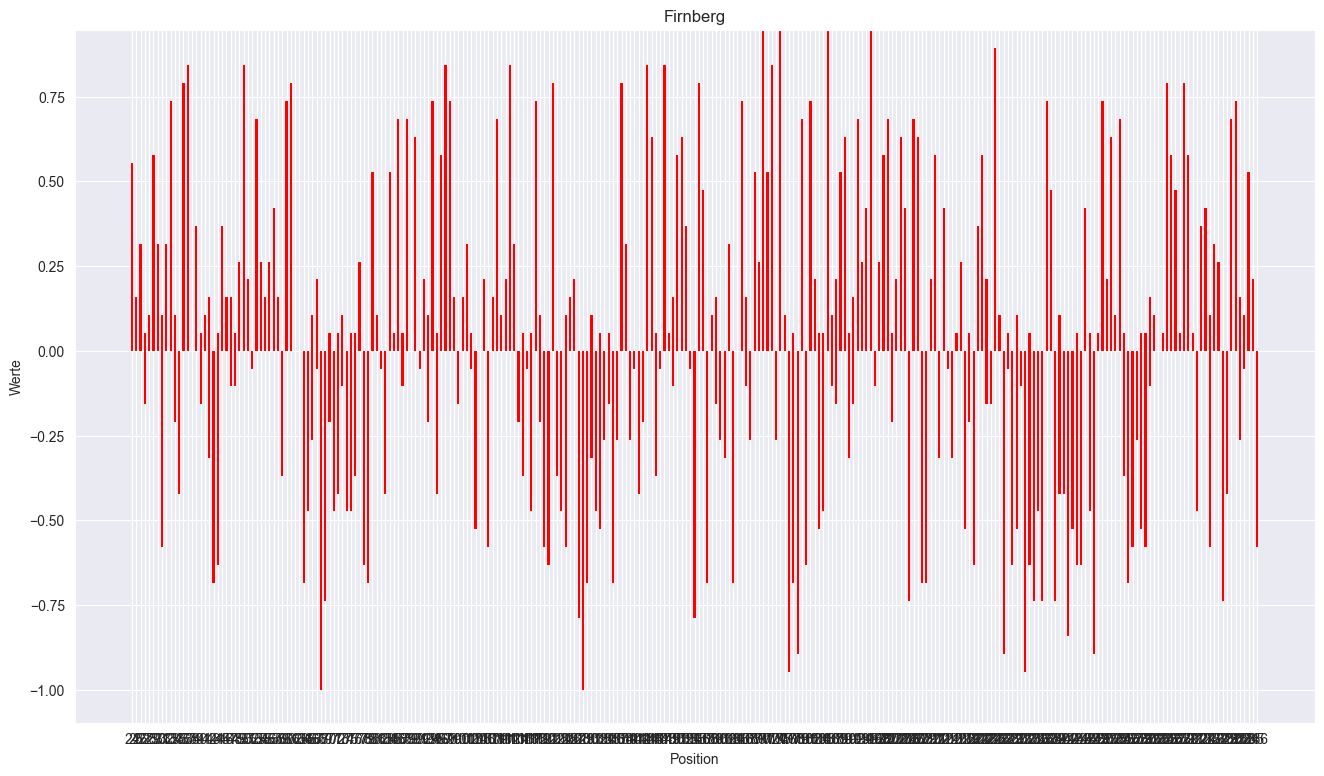

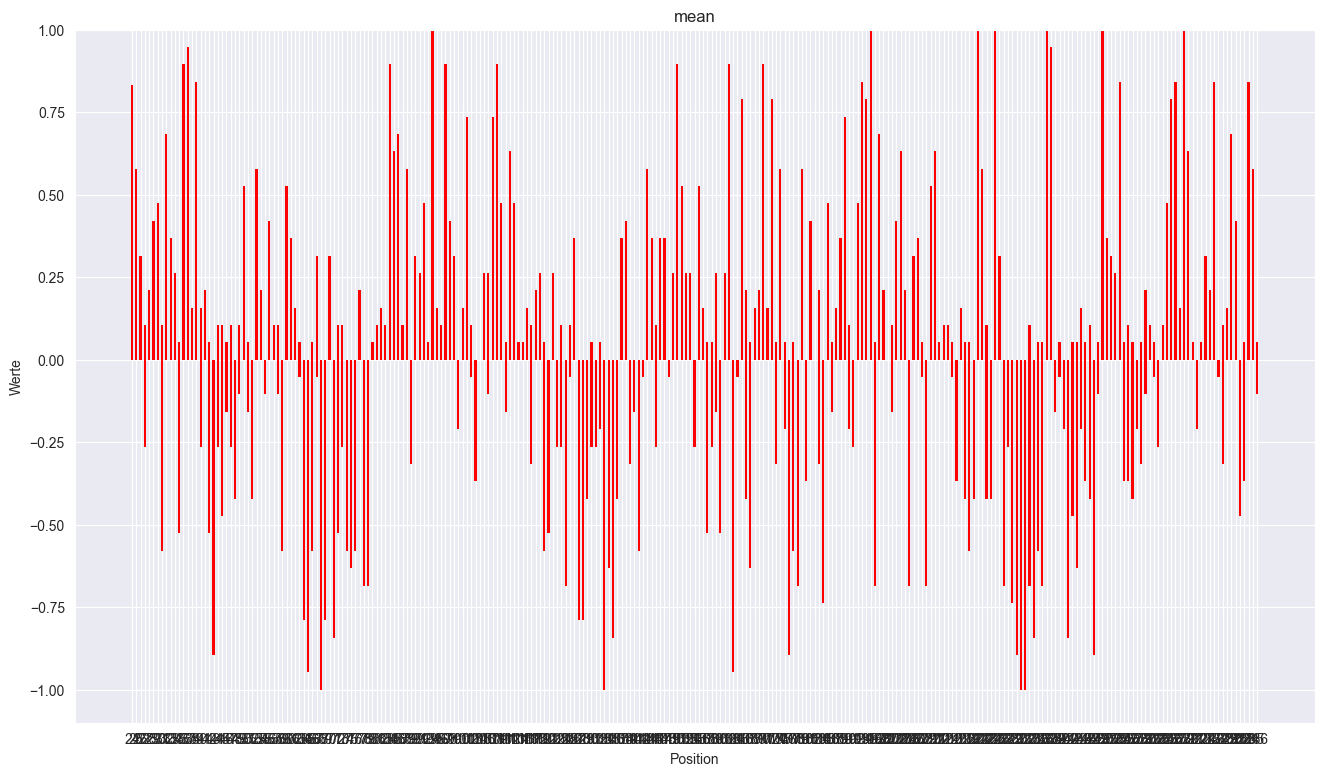

In [231]:
#andere plot Möglichkeit (Robustness (Top) nach oben, Fragility (Bottom) nach unten):

positions = top_25_DSlist_poseff[0].index

for i in range (0, len(top_25_DSlist)):
    top_values = top_25_DSlist_poseff[i]
    bottom_values = bottom_25_DSlist_poseff[i]*-1

# Breite der Balken

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_25.columns[i])

# Plot anzeigen
    plt.show()


aktuell: Position, für die alle Mutanten knapp über 75% Quantile liegen hätte 100% Robustness, genauso wie Position für die alle Mutanten über 95% Quantile liegen... da müsste noch differenziert werden.
Modell: Für jede Position Robustness/Fragility [%] für Quantile=75% bis 95% oder 99% berechnen->Kurve Fitten (x: Quantile, y: Fragility/Robustness [%] -> Area under Curve als F/R-score nehmen (evtl noch Bereiche für hohe Quantile größer Gewichten (also: y:F/R[%]*Q oder *Q^2 oder Q^3 etc. -> dann schauen welche Gewichtung die besten Ergebnisse gibt)

In [504]:
#F/R [%] für jede Position bei verschiedenen Quantilen berechnen
#tops:

top_Fit=mergedc_z_mv.copy()
top_Fit_DSlist=[]
for col in top_Fit.columns[:4]:
    new_DS = top_Fit[[col, 'Position']]
    top_Fit_DSlist.append(new_DS)



top_Fit_Qlist=[]
for i in range(0, len(top_Fit_DSlist)):
    top_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,25):
        top_Fit_Qlist[i].insert(j, top_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+75)/100 #iterate over Quantiles 75% - 99%
        t=top_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        top_Fit_Qlist[i][j].iloc[:,0]=(top_Fit_Qlist[i][j].iloc[:,0] >= t)


#calculate top % for each position for different quantile-threshholds for each dataset

top_Fit_Qlist_poseff=[]
for i in range (0, len(top_Fit_DSlist)):
    top_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,25):
        x=top_Fit_Qlist[i][j].iloc[:,0].groupby(top_Fit_Qlist[i][j].iloc[:,1])
        top_Fit_Qlist_poseff[i].insert(j, x.mean())

top_Fit_Qlist_poseff

#bottoms:
bottom_Fit=mergedc_z_mv.copy()
bottom_Fit_DSlist=[]
for col in bottom_Fit.columns[:4]:
    new_DS = bottom_Fit[[col, 'Position']]
    bottom_Fit_DSlist.append(new_DS)



bottom_Fit_Qlist=[]
for i in range(0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (1,26):
        bottom_Fit_Qlist[i].insert(j, bottom_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j)/100 #iterate over Quantiles 1% - 25%
        t=bottom_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        bottom_Fit_Qlist[i][j].iloc[:,0]=(bottom_Fit_Qlist[i][j].iloc[:,0] <= t)


#calculate bottom % for each position for different quantile-threshholds for each dataset

bottom_Fit_Qlist_poseff=[]
for i in range (0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,25):
        x=bottom_Fit_Qlist[i][j].iloc[:,0].groupby(bottom_Fit_Qlist[i][j].iloc[:,1])
        bottom_Fit_Qlist_poseff[i].insert(j, x.mean())

bottom_Fit_Qlist_poseff

IndexError: list index out of range

In [505]:
#extract F/R % for each position at different quantiles for each dataset to plot curve and calculate area under curve as R/F-score of position:

#tops:
top_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(top_Fit_DSlist)): #iterate over datasets
   for k in range(0,len(top_Fit_Qlist_poseff[0][0])): #iterate over positions
     top_pos_eff_quantiles=[]
     for j in range(0,25): #iterate over quantiles
        top_pos_eff_quantiles.append(top_Fit_Qlist_poseff[i][j].iloc[k])
     top_pos_eff_quantiles_df.iloc[k,i]=top_pos_eff_quantiles
top_pos_eff_quantiles_df

#bottoms:

bottom_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(bottom_Fit_DSlist)): #iterate over datasets
   for k in range(0,len(bottom_Fit_Qlist_poseff[0][0])): #iterate over positions
     bottom_pos_eff_quantiles=[]
     for j in range(0,25): #iterate over quantiles
        bottom_pos_eff_quantiles.append(bottom_Fit_Qlist_poseff[i][j].iloc[k])
     bottom_pos_eff_quantiles_df.iloc[k,i]=bottom_pos_eff_quantiles
bottom_pos_eff_quantiles_df

,mean_Stiffler_z,var_Stiffler_z,mean_Deng_z,var_Deng_z,mean_Firnberg_z,var_Firnberg_z,mean_all_z,var_all_z
Position,,,,,,,,
24,"[0.3888888888888889, 0.3888888888888889, 0.388...","[0.16666666666666666, 0.16666666666666666, 0.1...","[0.5555555555555556, 0.5555555555555556, 0.555...","[0.8333333333333334, 0.8333333333333334, 0.833...",0.966881,0.453596,0.54705,0.588671
25,"[0.5789473684210527, 0.5789473684210527, 0.578...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.5789473684210527, 0.5789473684210527, 0.578...",0.49345,0.232222,0.415063,0.616515
26,"[0.5789473684210527, 0.5789473684210527, 0.578...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3157894736842105, 0.3157894736842105, 0.315...","[0.3157894736842105, 0.3157894736842105, 0.315...",0.906685,0.308594,0.318937,0.815305
27,"[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.10526315789473684, 0.1...",-0.514142,0.413599,-0.256228,0.476164
28,"[0.2631578947368421, 0.2631578947368421, 0.263...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.21052631578947367, 0.21052631578947367, 0.2...",0.090621,0.385542,0.113409,0.522439
...,...,...,...,...,...,...,...,...
282,"[0.15789473684210525, 0.15789473684210525, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.376808,0.826386,-0.392689,0.779453
283,"[0.05263157894736842, 0.05263157894736842, 0.0...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...",-0.152312,0.704399,-0.191559,0.625586
284,"[0.47368421052631576, 0.47368421052631576, 0.4...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.5263157894736842, 0.5263157894736842, 0.526...","[0.8421052631578947, 0.8421052631578947, 0.842...",0.974941,0.393654,0.450595,0.806401


In [502]:
#the pos_eff_quantiles_dfs contains for each Dataset and each position the F/R %s for Quantiles 75% - 99%
#now we want to fit curves to each position in each dataset


,mean_Stiffler_z,var_Stiffler_z,mean_Deng_z,var_Deng_z,mean_Firnberg_z,var_Firnberg_z,mean_all_z,var_all_z
Position,,,,,,,,
24,"[0.3888888888888889, 0.3888888888888889, 0.333...","[0.16666666666666666, 0.16666666666666666, 0.1...","[0.5555555555555556, 0.5, 0.5, 0.5, 0.5, 0.444...","[0.8333333333333334, 0.8333333333333334, 0.833...",0.966881,0.453596,0.54705,0.588671
25,"[0.5789473684210527, 0.5263157894736842, 0.526...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.5789473684210527, 0.5263157894736842, 0.526...",0.49345,0.232222,0.415063,0.616515
26,"[0.5789473684210527, 0.5263157894736842, 0.473...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3157894736842105, 0.3157894736842105, 0.315...","[0.3157894736842105, 0.3157894736842105, 0.315...",0.906685,0.308594,0.318937,0.815305
27,"[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.05263157894736842, 0.0...",-0.514142,0.413599,-0.256228,0.476164
28,"[0.2631578947368421, 0.2631578947368421, 0.210...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.21052631578947367, 0.21052631578947367, 0.2...",0.090621,0.385542,0.113409,0.522439
...,...,...,...,...,...,...,...,...
282,"[0.15789473684210525, 0.15789473684210525, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.15789473684210525, 0.15789473684210525, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.376808,0.826386,-0.392689,0.779453
283,"[0.05263157894736842, 0.05263157894736842, 0.0...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.10526315789473684, 0.10526315789473684, 0.1...","[0.05263157894736842, 0.05263157894736842, 0.0...",-0.152312,0.704399,-0.191559,0.625586
284,"[0.47368421052631576, 0.3684210526315789, 0.36...","[0.05263157894736842, 0.05263157894736842, 0.0...","[0.5263157894736842, 0.5263157894736842, 0.526...","[0.8421052631578947, 0.8421052631578947, 0.789...",0.974941,0.393654,0.450595,0.806401
